<a href="https://colab.research.google.com/github/oluwafemidiakhoa/AIreasearcher/blob/main/SMOLEagent_pubmed.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install smolagents biopython markdownify transformers nltk spacy
!pip install spacy
!python -m spacy download en_core_web_sm


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.9/89.9 kB 3.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.7/67.7 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.2/3.2 MB 36.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 MB 12.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 320.6/320.6 kB 28.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.6/6.6 MB 92.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.1/13.1 MB 93.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.7/81.7 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.8/94.8 kB 8.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.4/76.4 kB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 81.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.3/11.3 MB 96.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.2/73.2 kB 6.

In [52]:
import spacy
from Bio import Entrez
from smolagents import CodeAgent, LiteLLMModel

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Configure PubMed API
Entrez.email = "oluwafemidiakhoa@gmail.com"  # Replace with your email

# Fetch articles from PubMed
def fetch_pubmed_articles(query, max_results=5):
    """
    Fetch articles from PubMed API based on the query.
    """
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()

    # Fetch detailed information for each article
    article_ids = record['IdList']
    articles = []
    for article_id in article_ids:
        fetch_handle = Entrez.efetch(db="pubmed", id=article_id, rettype="abstract", retmode="text")
        articles.append(fetch_handle.read())
        fetch_handle.close()

    return articles

# Keyword extraction using SpaCy
def extract_keywords_spacy(text, max_keywords=10):
    """
    Extract keywords from text using SpaCy by identifying significant nouns and verbs.
    """
    doc = nlp(text)
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop and token.pos_ in {"NOUN", "VERB"}]
    return keywords[:max_keywords]

# Summarization agent
model = LiteLLMModel(model_id="gpt-4o", api_key="")  # Replace with your key

def summarize_article(article):
    """
    Summarize the given article using SmolAgents.
    """
    agent = CodeAgent(model=model, tools=[])
    prompt = f"Summarize the following article:\n\n{article}"
    summary = agent.run(prompt)
    return summary

# Multi-agent workflow
def multi_agent_workflow(query, max_results=3):
    """
    Multi-agent system to fetch, summarize, and analyze research articles.
    """
    # Fetch articles from PubMed
    articles = fetch_pubmed_articles(query, max_results=max_results)

    results = []
    for i, article in enumerate(articles):
        print(f"\n--- Article {i+1} ---")

        # Summarize the article
        summary = summarize_article(article)
        print("Summary:")
        print(summary)

        # Extract keywords
        keywords = extract_keywords_spacy(article)
        print("Keywords:")
        print(keywords)

        results.append({"summary": summary, "keywords": keywords})

    return results

# Test the workflow
if __name__ == "__main__":
    research_query = "AI applications in cancer diagnosis"
    print("\n=== Multi-Agent Workflow ===")
    results = multi_agent_workflow(research_query, max_results=3)



=== Multi-Agent Workflow ===

--- Article 1 ---


╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Front Oncol. 2024 Dec 23;14:1486310. doi: 10.3389/fonc.2024.1486310.                                                                                                                              │
│ eCollection  2024.                                                                                                                                                                                   │
│                                                                                                                                                                                                      │
│ Artificial intelligence in lung cancer: current applications, future                                                                                                                                 │
│ perspectives, and challenges.                                                                                                                                                                        │
│                                                                                                                                                                                                      │
│ Huang D(1), Li Z(2), Jiang T(1), Yang C(1), Li N(1).                                                                                                                                                 │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Respiratory and Critical Care Medicine, Center for Respiratory                                                                                                                      │
│ Medicine, the Fourth Affiliated Hospital of School of Medicine, and                                                                                                                                  │
│ International School of Medicine, International Institutes of Medicine, Zhejiang                                                                                                                     │
│ University, Yiwu, China.                                                                                                                                                                             │
│ (2)Department of Rehabilitation Medicine, Yiwu Central Hospital, Yiwu, China.                                                                                                                        │
│                                                                                                                                                                                                      │
│ Artificial intelligence (AI) has significantly impacted various fields,                                                                                                            

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Summary of the article                                                                                                                                                                        │
│    2 summary = (                                                                                                                                                                                     │
│    3     "The article is a comprehensive review exploring the significant impact of "                                                                                                                │
│    4     "Artificial Intelligence (AI) on lung cancer research and treatment. It discusses "                                                                                                         │
│    5     "AI's current applications in genomics, transcriptomics, proteomics, metabolomics, "                                                                                                        │
│    6     "immunomics, microbiomics, radiomics, and pathomics, and highlights AI's transformative "                                                                                                   │
│    7     "role in enhancing early detection, personalizing treatment strategies, and accelerating "                                                                                                  │
│    8     "therapeutic innovations. AI's potential includes providing more accurate diagnostics, "                                                                                                    │
│    9     "tailored treatment plans, predicting patient responses to immunotherapy, and forecasting "                                                                                                 │
│   10     "survival rates, especially for non-small cell lung cancer (NSCLC). The article also "                                                                                                      │
│   11     "addresses technical challenges, such as data issues, model interpretability, and "                                                                                                         │
│   12     "ethical considerations, while underscoring AI's pivotal role in advancing lung cancer "                                                                                                    │
│   13     "patient outcomes and quality of life."                                                                                                                                                     │
│   14 )                                                                                                                                                                                               │
│   15 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article is a comprehensive review exploring the significant impact of Artificial Intelligence (AI) on lung cancer research and treatment. It discusses AI's current applications
in genomics, transcriptomics, proteomics, metabolomics, immunomics, microbiomics, radiomics, and pathomics, and highlights AI's transformative role in enhancing early detection, personalizing 
treatment strategies, and accelerating therapeutic innovations. AI's potential includes providing more accurate diagnostics, tailored treatment plans, predicting patient responses to immunotherapy, 
and forecasting survival rates, especially for non-small cell lung cancer (NSCLC). The article also addresses technical challenges, such as data issues, model interpretability, and ethical 
considerations, while underscoring AI's pivotal role in advancing lung cancer patient outcomes and quality of life.

[Step 0: Duration 3.35 seconds| Input tokens: 2,474 | Output tokens: 261]

Summary:
The article is a comprehensive review exploring the significant impact of Artificial Intelligence (AI) on lung cancer research and treatment. It discusses AI's current applications in genomics, transcriptomics, proteomics, metabolomics, immunomics, microbiomics, radiomics, and pathomics, and highlights AI's transformative role in enhancing early detection, personalizing treatment strategies, and accelerating therapeutic innovations. AI's potential includes providing more accurate diagnostics, tailored treatment plans, predicting patient responses to immunotherapy, and forecasting survival rates, especially for non-small cell lung cancer (NSCLC). The article also addresses technical challenges, such as data issues, model interpretability, and ethical considerations, while underscoring AI's pivotal role in advancing lung cancer patient outcomes and quality of life.
Keywords:
['intelligence', 'lung', 'cancer', 'applications', 'perspectives', 'challenges', 'Author', 'information',

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Digit Health. 2025 Jan 3;11:20552076241300229. doi: 10.1177/20552076241300229.                                                                                                                    │
│  eCollection 2025 Jan-Dec.                                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ Artificial intelligence in precision medicine for lung cancer: A bibliometric                                                                                                                        │
│ analysis.                                                                                                                                                                                            │
│                                                                                                                                                                                                      │
│ Wang Y(1), Zhang W(1), Liu X(1), Tian L(1), Li W(1), He P(1), Huang S(1)(2), He                                                                                                                      │
│ F(3), Pan X(3).                                                                                                                                                                                      │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Pharmacy, Hunan University of Chinese Medicine, Changsha, Hunan                                                                                                                     │
│ Province, China.                                                                                                                                                                                     │
│ (2)Jiuzhitang Co., Ltd, Changsha, Hunan Province, China.                                                                                                                                             │
│ (3)School of Pharmacy, Hunan University of Chinese Medicine, Changsha, Hunan                                                                                                                         │
│ Province, China.                                                                                                                                                                                     │
│                                                                                                                                                                                    

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Summary of the article                                                                                                                                                                        │
│    2                                                                                                                                                                                                 │
│    3 summary = """                                                                                                                                                                                   │
│    4 This article provides a bibliometric analysis of the role of artificial intelligence (AI) in precision medicine for lung cancer. The study acknowledges the increasing application of AI in     │
│      this field due to the growing body of evidence supporting its effectiveness. The analysis utilized data extracted from the Web of Science Core Collection database and applied tools such as    │
│      CiteSpace and VOSviewer.                                                                                                                                                                        │
│    5                                                                                                                                                                                                 │
│    6 The results of the study included a total of 4062 manuscripts, with 92.27% published from 2014 onwards. The primary contributing countries in the field were China, the United States, India,   │
│      Japan, and Korea. The manuscripts were published across disciplines like Radiology Nuclear Medicine, Medical Imaging, Oncology, and Computer Science. Key authors identified include Li Weimin  │
│      and Aerts Hugo J. W. L. Through keyword co-occurrence and co-citation cluster analysis, four main clusters emerged: screening, diagnosis, treatment, and prognosis.                             │
│    7                                                                                                                                                                                                 │
│    8 The conclusion highlights that AI, particularly deep learning frameworks and AI-based radiomics, is gaining significant attention. The potential of high-quality, standardized data to          │
│      transform lung cancer screening and diagnosis is emphasized. Nonetheless, the study stresses the need for high-quality clinical datasets, the development of new AI models, and their rigorous  │
│      assessment before their effective clinical application can be realized.                                                                                                                         │
│    9 """                                                                                                                                                                                             │
│   10                                                                                                                                                                                                 │
│   11 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
This article provides a bibliometric analysis of the role of artificial intelligence (AI) in precision medicine for lung cancer. The study acknowledges the increasing application of AI in this field 
due to the growing body of evidence supporting its effectiveness. The analysis utilized data extracted from the Web of Science Core Collection database and applied tools such as CiteSpace and 
VOSviewer.

The results of the study included a total of 4062 manuscripts, with 92.27% published from 2014 onwards. The primary contributing countries in the field were China, the United States, India, Japan, and
Korea. The manuscripts were published across disciplines like Radiology Nuclear Medicine, Medical Imaging, Oncology, and Computer Science. Key authors identified include Li Weimin and Aerts Hugo J. W.
L. Through keyword co-occurrence and co-citation cluster analysis, four main clusters emerged: screening, diagnosis, treatment, and prognosis.

The conclusion highlights that AI, particularly deep learning frameworks and AI-based radiomics, is gaining significant attention. The potential of high-quality, standardized data to transform lung 
cancer screening and diagnosis is emphasized. Nonetheless, the study stresses the need for high-quality clinical datasets, the development of new AI models, and their rigorous assessment before their 
effective clinical application can be realized.

[Step 0: Duration 3.96 seconds| Input tokens: 2,516 | Output tokens: 321]

Summary:

This article provides a bibliometric analysis of the role of artificial intelligence (AI) in precision medicine for lung cancer. The study acknowledges the increasing application of AI in this field due to the growing body of evidence supporting its effectiveness. The analysis utilized data extracted from the Web of Science Core Collection database and applied tools such as CiteSpace and VOSviewer.

The results of the study included a total of 4062 manuscripts, with 92.27% published from 2014 onwards. The primary contributing countries in the field were China, the United States, India, Japan, and Korea. The manuscripts were published across disciplines like Radiology Nuclear Medicine, Medical Imaging, Oncology, and Computer Science. Key authors identified include Li Weimin and Aerts Hugo J. W. L. Through keyword co-occurrence and co-citation cluster analysis, four main clusters emerged: screening, diagnosis, treatment, and prognosis.

The conclusion highlights that AI, partic

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. BMC Cancer. 2025 Jan 3;25(1):10. doi: 10.1186/s12885-024-13402-3.                                                                                                                                 │
│                                                                                                                                                                                                      │
│ Evaluation of an enhanced ResNet-18 classification model for rapid On-site                                                                                                                           │
│ diagnosis in respiratory cytology.                                                                                                                                                                   │
│                                                                                                                                                                                                      │
│ Gong W(#)(1), Vaishnani DK(#)(2), Jin XC(3), Zeng J(3), Chen W(4), Huang H(5),                                                                                                                       │
│ Zhou YQ(2), Hla KWY(2), Geng C(6), Ma J(7).                                                                                                                                                          │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Pathology, Lishui Municipal Central Hospital, Lishui, 323000,                                                                                                                       │
│ Zhejiang Province, China.                                                                                                                                                                            │
│ (2)School of International Studies, Wenzhou Medical University, Ouhai District,                                                                                                                      │
│ Chashan, Wenzhou, 325035, Zhejiang Province, China.                                                                                                                                                  │
│ (3)School of Clinical Medicine, Wenzhou Medical University, Ouhai District,                                                                                                                          │
│ Chashan, Wenzhou, Zhejiang Province, 325035, China.                                                                                                                                                  │
│ (4)Renji College, Wenzhou Medical University, Wenzhou, 325035, Zhejiang, PR                                                                                                        

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 # Summarizing the given article text                                                                                                                                                             │
│   2 summary = """                                                                                                                                                                                    │
│   3 The study aims to evaluate an enhanced ResNet-18 classification model for rapid on-site evaluation (ROSE) of respiratory cytology specimens, a technique crucial for early and accurate lung     │
│     cancer diagnosis. In China, ROSE is underutilized due to limited knowledge of the Diff-Quik staining method and a shortage of trained cytopathologists. The study involves 116 digital images of │
│     stained cytology samples, divided into six diagnostic categories. Both experienced cytopathologists and an AI system were tested, with the AI system showing diagnostic proficiency comparable   │
│     to humans. The combination of AI assistance improved diagnostic efficiency. Despite the promising results of the AI model, human expertise remains essential for on-site diagnosis.              │
│   4 """                                                                                                                                                                                              │
│   5                                                                                                                                                                                                  │
│   6 final_answer(summary)                                                                                                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
The study aims to evaluate an enhanced ResNet-18 classification model for rapid on-site evaluation (ROSE) of respiratory cytology specimens, a technique crucial for early and accurate lung cancer 
diagnosis. In China, ROSE is underutilized due to limited knowledge of the Diff-Quik staining method and a shortage of trained cytopathologists. The study involves 116 digital images of stained 
cytology samples, divided into six diagnostic categories. Both experienced cytopathologists and an AI system were tested, with the AI system showing diagnostic proficiency comparable to humans. The 
combination of AI assistance improved diagnostic efficiency. Despite the promising results of the AI model, human expertise remains essential for on-site diagnosis.

[Step 0: Duration 2.53 seconds| Input tokens: 2,825 | Output tokens: 207]

Summary:

The study aims to evaluate an enhanced ResNet-18 classification model for rapid on-site evaluation (ROSE) of respiratory cytology specimens, a technique crucial for early and accurate lung cancer diagnosis. In China, ROSE is underutilized due to limited knowledge of the Diff-Quik staining method and a shortage of trained cytopathologists. The study involves 116 digital images of stained cytology samples, divided into six diagnostic categories. Both experienced cytopathologists and an AI system were tested, with the AI system showing diagnostic proficiency comparable to humans. The combination of AI assistance improved diagnostic efficiency. Despite the promising results of the AI model, human expertise remains essential for on-site diagnosis.

Keywords:
['classification', 'model', 'site', 'diagnosis', 'cytology', 'Author', 'information', 'Contributed', 'OBJECTIVE', 'site']


In [7]:
import spacy
from Bio import Entrez
from smolagents import CodeAgent, LiteLLMModel
from sklearn.metrics.pairwise import cosine_similarity

# Load SpaCy model
nlp = spacy.load("en_core_web_sm")

# Configure PubMed API
Entrez.email = "oluwafemidiakhoa@gmail.com"  # Replace with your email

# Initialize SmolAgents LLM model
model = LiteLLMModel(model_id="gpt-4o", api_key="")  # Replace with your API key


# Fetch articles from PubMed
def fetch_pubmed_articles(query: str, max_results: int = 5) -> list:
    """
    Fetches articles from PubMed based on a search query.

    Args:
        query (str): The search term for PubMed.
        max_results (int): Maximum number of articles to fetch.

    Returns:
        list: A list of article abstracts.
    """
    handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
    record = Entrez.read(handle)
    handle.close()

    article_ids = record['IdList']
    articles = []
    for article_id in article_ids:
        fetch_handle = Entrez.efetch(db="pubmed", id=article_id, rettype="abstract", retmode="text")
        articles.append(fetch_handle.read())
        fetch_handle.close()

    return articles

# Extract keywords with SpaCy
def extract_keywords(text: str, max_keywords: int = 10) -> list:
    """
    Extracts keywords from a text using SpaCy, focusing on nouns and verbs.

    Args:
        text (str): The input text.
        max_keywords (int): The maximum number of keywords to extract.

    Returns:
        list: A list of extracted keywords.
    """
    if not isinstance(text, str):
        text = str(text)

    doc = nlp(text)
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop and token.pos_ in {"NOUN", "VERB"}]
    return keywords[:max_keywords]

# Summarize articles using SmolAgents
def summarize_article(article: str) -> str:
    """
    Summarizes an article using SmolAgents.

    Args:
        article (str): The article text.

    Returns:
        str: The summary of the article.
    """
    if not isinstance(article, str):
        article = str(article)

    agent = CodeAgent(model=model, tools=[])
    prompt = f"Summarize the following article:\n\n{article}"
    summary = agent.run(prompt)

    # Handle cases where summary might be a dictionary
    if isinstance(summary, dict):
        summary = summary.get("Conclusion", "No summary available.")
    return summary

# Compute semantic similarity
def compute_similarity(summaries: list) -> list:
    """
    Computes semantic similarity between summaries using cosine similarity.

    Args:
        summaries (list): A list of summaries.

    Returns:
        list: A similarity matrix.
    """
    embeddings = [nlp(str(summary)).vector for summary in summaries]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

# Generate insights
def generate_insights(summaries: list, similarity_matrix: list) -> None:
    """
    Generates insights from summaries and their semantic similarities.

    Args:
        summaries (list): List of article summaries.
        similarity_matrix (list): Semantic similarity matrix.
    """
    agent = CodeAgent(model=model, tools=[])
    insights_prompt = f"""
    Analyze the following summaries and their semantic similarities to identify:
    1. Overlapping themes.
    2. Unique findings in each article.
    3. Key challenges and future directions.

    Summaries:
    {summaries}

    Similarity Matrix:
    {similarity_matrix}
    """
    insights = agent.run(insights_prompt)
    print("\n--- Automated Insights ---")
    print(insights)

# Multi-agent workflow
def multi_agent_workflow(query: str, max_results: int = 5) -> list:
    """
    Processes articles by summarizing them, extracting keywords, computing similarity, and generating insights.

    Args:
        query (str): The search query for PubMed.
        max_results (int): Maximum number of articles to process.

    Returns:
        list: A list of processed article data.
    """
    articles = fetch_pubmed_articles(query, max_results=max_results)

    results = []
    summaries = []
    for i, article in enumerate(articles):
        print(f"\n--- Article {i+1} ---")

        # Summarize the article
        summary = summarize_article(article)
        summaries.append(summary)
        print("Summary:")
        print(summary)

        # Extract keywords
        keywords = extract_keywords(article)
        print("Keywords:")
        print(keywords)

        results.append({"summary": summary, "keywords": keywords, "article": article})

    # Compute semantic similarity
    similarity_matrix = compute_similarity(summaries)
    print("\nSemantic Similarity Matrix:")
    print(similarity_matrix)

    # Generate insights
    generate_insights(summaries, similarity_matrix)
    return results

# Run the workflow
if __name__ == "__main__":
    research_query = "AI applications in cancer diagnosis"
    print("\n=== Multi-Agent Workflow ===")
    results = multi_agent_workflow(research_query, max_results=5)



=== Multi-Agent Workflow ===

--- Article 1 ---


╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Molecules. 2024 Dec 23;29(24):6062. doi: 10.3390/molecules29246062.                                                                                                                               │
│                                                                                                                                                                                                      │
│ Future Prospect of Low-Molecular-Weight Prostate-Specific Membrane Antigen                                                                                                                           │
│ Radioisotopes Labeled as Theranostic Agents for Metastatic Castration-Resistant                                                                                                                      │
│ Prostate Cancer.                                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ Ismuha RR(1)(2), Ritawidya R(3)(4), Daruwati I(3)(4), Muchtaridi M(1)(4).                                                                                                                            │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Analysis and Medicinal Chemistry, Faculty of Pharmacy,                                                                                                                              │
│ Universitas Padjadjaran, Sumedang 45363, Indonesia.                                                                                                                                                  │
│ (2)Department of Pharmacy, Dharmais Cancer Hospital-National Cancer Center,                                                                                                                          │
│ Jakarta 11420, Indonesia.                                                                                                                                                                            │
│ (3)Center for Research on Radioisotope Technology, Radiopharmaceuticals, and                                                                                                                         │
│ Biodosimetry, National Research and Innovation Agency (BRIN), South Tangerang                                                                                                                        │
│ 15314, Indonesia.                                                                                                                                                                  

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 summary = (                                                                                                                                                                                      │
│   2     "The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for metastatic       │
│     castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these       │
│     inhibitors has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the        │
│     potential of these labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted       │
│     radioligands to assess binding affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings       │
│     suggest these radiopharmaceuticals are promising in terms of safety and efficacy for clinical applications, showing specific accumulation in prostate tumor lesions, thus enhancing diagnostic   │
│     and treatment capabilities for personalized patient care."                                                                                                                                       │
│   3 )                                                                                                                                                                                                │
│   4 final_answer(summary)                                                                                                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for 
metastatic castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these 
inhibitors has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the potential of 
these labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted radioligands to assess 
binding affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings suggest these radiopharmaceuticals 
are promising in terms of safety and efficacy for clinical applications, showing specific accumulation in prostate tumor lesions, thus enhancing diagnostic and treatment capabilities for personalized 
patient care.

[Step 0: Duration 7.22 seconds| Input tokens: 2,580 | Output tokens: 244]

Summary:
The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for metastatic castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these inhibitors has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the potential of these labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted radioligands to assess binding affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings suggest these radiopharmaceuticals are promising in terms of s

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Int J Mol Sci. 2024 Dec 20;25(24):13669. doi: 10.3390/ijms252413669.                                                                                                                              │
│                                                                                                                                                                                                      │
│ The Role of ctDNA in the Management of Non-Small-Cell Lung Cancer in the AI and                                                                                                                      │
│ NGS Era.                                                                                                                                                                                             │
│                                                                                                                                                                                                      │
│ Costa J(1)(2), Membrino A(1)(2), Zanchetta C(1)(2), Rizzato S(2), Cortiula                                                                                                                           │
│ F(2)(3), Rossetto C(2), Pelizzari G(2), Aprile G(2), Macerelli M(2).                                                                                                                                 │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Medicine (DAME), University of Udine, 33100 Udine, Italy.                                                                                                                           │
│ (2)Department of Oncology, University Hospital of Udine, 33100 Udine, Italy.                                                                                                                         │
│ (3)Department of Respiratory Medicine, Maastricht University Medical Centre,                                                                                                                         │
│ GROW School for Oncology and Reproduction, 6229 ER Maastricht, The Netherlands.                                                                                                                      │
│                                                                                                                                                                                                      │
│ Liquid biopsy (LB) involves the analysis of circulating tumour-derived DNA                                                                                                                           │
│ (ctDNA), providing a minimally invasive method for gathering both quantitative                                                                                                     

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 summary = """                                                                                                                                                                                    │
│   2 The article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential when integrated with next-generation sequencing │
│     (NGS) and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative and qualitative insights into tumors.        │
│     Genomic analysis via NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for diagnosing and monitoring minimal       │
│     residual disease (MRD), as well as in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite its potential, LB's clinical     │
│     application is limited by significant costs, limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue for processing complex    │
│     data, enhancing therapeutic decision-making, and refining risk assessment.                                                                                                                       │
│   3 """                                                                                                                                                                                              │
│   4 final_answer(summary)                                                                                                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
The article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential when integrated with next-generation sequencing (NGS) 
and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative and qualitative insights into tumors. Genomic analysis via
NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for diagnosing and monitoring minimal residual disease (MRD), as well as
in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite its potential, LB's clinical application is limited by significant costs, 
limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue for processing complex data, enhancing therapeutic decision-making, and 
refining risk assessment.

[Step 0: Duration 7.13 seconds| Input tokens: 2,344 | Output tokens: 281]

Summary:

The article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential when integrated with next-generation sequencing (NGS) and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative and qualitative insights into tumors. Genomic analysis via NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for diagnosing and monitoring minimal residual disease (MRD), as well as in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite its potential, LB's clinical application is limited by significant costs, limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue for processing complex data, enhancing therapeutic decision-making, 

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Int J Mol Sci. 2024 Dec 10;25(24):13250. doi: 10.3390/ijms252413250.                                                                                                                              │
│                                                                                                                                                                                                      │
│ Enhancing Clinical Applications by Evaluation of Sensitivity and Specificity in                                                                                                                      │
│ Whole Exome Sequencing.                                                                                                                                                                              │
│                                                                                                                                                                                                      │
│ Moon Y(1), Hong CH(2), Kim YH(3), Kim JK(1), Ye SH(2), Kang EK(2), Choi HW(2),                                                                                                                       │
│ Cho H(3), Choi H(3), Lee DE(4), Choi Y(5), Kim TM(6), Heo SG(7)(8)(9), Han                                                                                                                           │
│ N(10)(11)(12), Hong KM(1)(2).                                                                                                                                                                        │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Bioinformatics Analysis Team, Research Core Center, Research Institute,                                                                                                                           │
│ National Cancer Center, Goyang 10408, Gyeonggi-do, Republic of Korea.                                                                                                                                │
│ (2)Cancer Molecular Biology Branch, Division of Cancer Biology, Research                                                                                                                             │
│ Institute, National Cancer Center, Goyang 10408, Gyeonggi-do, Republic of Korea.                                                                                                                     │
│ (3)Diagnostic and Therapeutics Technology Branch, Division of Technology                                                                                                                             │
│ Convergence, Research Institute, National Cancer Center, Goyang 10408,                                                                                                             

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Start by summarizing the introduction and aims                                                                                                                                                │
│    2 summary = """                                                                                                                                                                                   │
│    3 The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to analyze  │
│      all coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by proposing methods to optimize  │
│      variant detection.                                                                                                                                                                              │
│    4 """                                                                                                                                                                                             │
│    5                                                                                                                                                                                                 │
│    6 # Summarize the methodology                                                                                                                                                                     │
│    7 summary += """                                                                                                                                                                                  │
│    8 The authors conducted WES using three different companies to evaluate the method's sensitivity and specificity. They used DNA reference standards from hydatidiform mole and blood samples in   │
│      varying ratios. The study compared one in-house analysis method to a commercial platform called DRAGEN (Dynamic Read Analysis for GENomics). Sensitivity was judged by the detection rate of    │
│      null-homozygote alleles while false positives were considered by unexpected alleles.                                                                                                            │
│    9 """                                                                                                                                                                                             │
│   10                                                                                                                                                                                                 │
│   11 # Summarize the results                                                                                                                                                                         │
│   12 summary += """                                                                                                                                                                                  │
│   13 Results showed that sensitivity varied significantly, with DRAGEN detecting more variants than in-house methods and increasing sensitivity for common variants. Although DRAGEN identified      │
│      higher false positives for certain companies, it minimized error variation, highlighting the importance of optimal bioinformatic conditions. Additionally, results indicated large differences  │
│      in false positive error rates among companies.                                                                                                                                

Execution logs:

The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to analyze all 
coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by proposing methods to optimize variant 
detection.

The authors conducted WES using three different companies to evaluate the method's sensitivity and specificity. They used DNA reference standards from hydatidiform mole and blood samples in varying 
ratios. The study compared one in-house analysis method to a commercial platform called DRAGEN (Dynamic Read Analysis for GENomics). Sensitivity was judged by the detection rate of null-homozygote 
alleles while false positives were considered by unexpected alleles.

Results showed that sensitivity varied significantly, with DRAGEN detecting more variants than in-house methods and increasing sensitivity for common variants. Although DRAGEN identified higher false 
positives for certain companies, it minimized error variation, highlighting the importance of optimal bioinformatic conditions. Additionally, results indicated large differences in false positive 
error rates among companies.

The study concludes with an emphasis on the need for optimized bioinformatic analyses based on sensitivity and specificity standards to enhance WES's clinical utility. The findings underscore the 
importance of setting optimal cutoff values for read depth and variant allele fraction.


Out: None

[Step 0: Duration 9.18 seconds| Input tokens: 2,760 | Output tokens: 361]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 final_answer(summary)                                                                                                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to analyze all 
coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by proposing methods to optimize variant 
detection.

The authors conducted WES using three different companies to evaluate the method's sensitivity and specificity. They used DNA reference standards from hydatidiform mole and blood samples in varying 
ratios. The study compared one in-house analysis method to a commercial platform called DRAGEN (Dynamic Read Analysis for GENomics). Sensitivity was judged by the detection rate of null-homozygote 
alleles while false positives were considered by unexpected alleles.

Results showed that sensitivity varied significantly, with DRAGEN detecting more variants than in-house methods and increasing sensitivity for common variants. Although DRAGEN identified higher false 
positives for certain companies, it minimized error variation, highlighting the importance of optimal bioinformatic conditions. Additionally, results indicated large differences in false positive 
error rates among companies.

The study concludes with an emphasis on the need for optimized bioinformatic analyses based on sensitivity and specificity standards to enhance WES's clinical utility. The findings underscore the 
importance of setting optimal cutoff values for read depth and variant allele fraction.

[Step 1: Duration 6.15 seconds| Input tokens: 6,549 | Output tokens: 605]

Summary:

The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to analyze all coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by proposing methods to optimize variant detection.

The authors conducted WES using three different companies to evaluate the method's sensitivity and specificity. They used DNA reference standards from hydatidiform mole and blood samples in varying ratios. The study compared one in-house analysis method to a commercial platform called DRAGEN (Dynamic Read Analysis for GENomics). Sensitivity was judged by the detection rate of null-homozygote alleles while false positives were considered by unexpected alleles.

Results showed that sensitivity varied significantly, with DRAGEN detecting more variants than in-house methods and increas

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Life (Basel). 2024 Dec 4;14(12):1602. doi: 10.3390/life14121602.                                                                                                                                  │
│                                                                                                                                                                                                      │
│ Artificial Intelligence in the Non-Invasive Detection of Melanoma.                                                                                                                                   │
│                                                                                                                                                                                                      │
│ İsmail Mendi B(1), Kose K(2), Fleshner L(3), Adam R(3), Safai B(3)(4), Farabi                                                                                                                        │
│ B(3)(4)(5), Atak MF(4).                                                                                                                                                                              │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Dermatology, Niğde Ömer Halisdemir University, Niğde 51000,                                                                                                                         │
│ Turkey.                                                                                                                                                                                              │
│ (2)Dermatology Service, Department of Medicine, Memorial Sloan Kettering Cancer                                                                                                                      │
│ Center, New York, NY 10021, USA.                                                                                                                                                                     │
│ (3)School of Medicine, New York Medical College, Valhalla, NY 10595, USA.                                                                                                                            │
│ (4)Dermatology Department, NYC Health + Hospital/Metropolitan, New York, NY                                                                                                                          │
│ 10029, USA.                                                                                                                                                                                          │
│ (5)Dermatology Department, NYC Health + Hospital/South Brooklyn, Brooklyn, NY                                                                                                      

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Summarizing the article based on provided content                                                                                                                                             │
│    2 summary = (                                                                                                                                                                                     │
│    3     "The article 'Artificial Intelligence in the Non-Invasive Detection of Melanoma' reviews the increasing role "                                                                              │
│    4     "of AI technologies in dermatology, specifically for the detection of melanoma. Melanoma, while less common "                                                                               │
│    5     "than other skin cancers, is the deadliest form. Current diagnosis relies largely on invasive biopsies which "                                                                              │
│    6     "are not always accessible due to cost and invasiveness. Image-based technologies like dermoscopy and confocal "                                                                            │
│    7     "microscopy are used for initial screenings but have limitations due to user variability and require significant "                                                                          │
│    8     "training for accurate use. AI presents a promising alternative by potentially providing more accurate, accessible, "                                                                       │
│    9     "and standardized diagnostic tools. The review focuses on the application of AI in clinical imaging, dermoscopic "                                                                          │
│   10     "evaluation, differentiation of melanoma from other skin cancers, and enhancements in in-vivo skin imaging devices."                                                                        │
│   11 )                                                                                                                                                                                               │
│   12 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article 'Artificial Intelligence in the Non-Invasive Detection of Melanoma' reviews the increasing role of AI technologies in dermatology, specifically for the detection of 
melanoma. Melanoma, while less common than other skin cancers, is the deadliest form. Current diagnosis relies largely on invasive biopsies which are not always accessible due to cost and 
invasiveness. Image-based technologies like dermoscopy and confocal microscopy are used for initial screenings but have limitations due to user variability and require significant training for 
accurate use. AI presents a promising alternative by potentially providing more accurate, accessible, and standardized diagnostic tools. The review focuses on the application of AI in clinical 
imaging, dermoscopic evaluation, differentiation of melanoma from other skin cancers, and enhancements in in-vivo skin imaging devices.

[Step 0: Duration 6.50 seconds| Input tokens: 2,455 | Output tokens: 278]

Summary:
The article 'Artificial Intelligence in the Non-Invasive Detection of Melanoma' reviews the increasing role of AI technologies in dermatology, specifically for the detection of melanoma. Melanoma, while less common than other skin cancers, is the deadliest form. Current diagnosis relies largely on invasive biopsies which are not always accessible due to cost and invasiveness. Image-based technologies like dermoscopy and confocal microscopy are used for initial screenings but have limitations due to user variability and require significant training for accurate use. AI presents a promising alternative by potentially providing more accurate, accessible, and standardized diagnostic tools. The review focuses on the application of AI in clinical imaging, dermoscopic evaluation, differentiation of melanoma from other skin cancers, and enhancements in in-vivo skin imaging devices.
Keywords:
['Author', 'information', 'Skin', 'cancer', 'cancers', 'increasing', 'incidence', 'Skin', 'can

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article:                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ 1. Bioengineering (Basel). 2024 Dec 13;11(12):1264. doi:                                                                                                                                             │
│ 10.3390/bioengineering11121264.                                                                                                                                                                      │
│                                                                                                                                                                                                      │
│ The Classification of Metastatic Spine Cancer and Spinal Compression Fractures                                                                                                                       │
│ by Using CNN and SVM Techniques.                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ Jeong W(1), Baek CH(2), Lee DY(3), Song SY(4), Na JB(5), Hidayat MS(1), Kim                                                                                                                          │
│ G(1)(6), Kim DH(2)(3).                                                                                                                                                                               │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Bio-Industrial Machinery Engineering, Gyeongsang National                                                                                                                           │
│ University, Jinju 52828, Republic of Korea.                                                                                                                                                          │
│ (2)Department of Orthopaedic Surgery, Institute of Medical Science, Gyeongsang                                                                                                                       │
│ National University College of Medicine and Gyeongsang National University                                                                                                                           │
│ Hospital, Jinju 52727, Republic of Korea.                                                                                                                                                            │
│ (3)Department of Orthopaedic Surgery, Jinju Barun Hosptial, Jinju 52727,                                                                                                           

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Extracting the key points for summary                                                                                                                                                         │
│    2 article_summary = (                                                                                                                                                                             │
│    3     "The article discusses a study focused on improving the accuracy of diagnosing "                                                                                                            │
│    4     "metastatic spine cancer and spinal compression fractures using MRI images. The researchers "                                                                                               │
│    5     "developed artificial intelligence models using convolutional neural networks (CNN) and "                                                                                                   │
│    6     "support vector machines (SVM) to differentiate between these conditions. MRI data from "                                                                                                   │
│    7     "Gyeongsang National University Hospital, collected over a three-year period, were "                                                                                                        │
│    8     "preprocessed using Otsu's binarization and Canny edge detection before being used in the models. "                                                                                         │
│    9     "The CNN model demonstrated high sensitivity and accuracy, particularly in identifying metastatic "                                                                                         │
│   10     "spine cancer, showing the potential for clinical application in AI-assisted diagnosis."                                                                                                    │
│   11 )                                                                                                                                                                                               │
│   12                                                                                                                                                                                                 │
│   13 print(article_summary)                                                                                                                                                                          │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Execution logs:
The article discusses a study focused on improving the accuracy of diagnosing metastatic spine cancer and spinal compression fractures using MRI images. The researchers developed artificial 
intelligence models using convolutional neural networks (CNN) and support vector machines (SVM) to differentiate between these conditions. MRI data from Gyeongsang National University Hospital, 
collected over a three-year period, were preprocessed using Otsu's binarization and Canny edge detection before being used in the models. The CNN model demonstrated high sensitivity and accuracy, 
particularly in identifying metastatic spine cancer, showing the potential for clinical application in AI-assisted diagnosis.

Out: None

[Step 0: Duration 5.60 seconds| Input tokens: 2,476 | Output tokens: 222]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/smolagents/utils.py:113 in parse_code_blob               │
│                                                                                                  │
│   110 │   │   pattern = r"```(?:py|python)?\n(.*?)\n```"                                         │
│   111 │   │   match = re.search(pattern, code_blob, re.DOTALL)                                   │
│   112 │   │   if match is None:                                                                  │
│ ❱ 113 │   │   │   raise ValueError(                                                              │
│   114 │   │   │   │   f"No match ground for regex pattern {pattern} in {code_blob=}."            │
│   115 │   │   │   )                                                                              │
│   116 │   │   return match.group(1).strip()                                                      │
╰──────────────────────────────────────────────────────────────────────────────────────────────────╯
ValueError: No match ground for regex pattern ```(?:py|python)?\n(.*?)\n``` in code_blob="The article discusses a study focused on improving the accuracy of diagnosing metastatic spine cancer and 
spinal compression fractures using MRI images. The researchers developed artificial intelligence models using convolutional neural networks (CNN) and support vector machines (SVM) to differentiate 
between these conditions. MRI data from Gyeongsang National University Hospital, collected over a three-year period, were preprocessed using Otsu's binarization and Canny edge detection before being 
used in the models. The CNN model demonstrated high sensitivity and accuracy, particularly in identifying metastatic spine cancer, showing the potential for clinical application in AI-assisted 
diagnosis.".

During handling of the above exception, another exception occurred:

╭─────────────────────────────── Traceback (most recent call last) ────────────────────────────────╮
│ /usr/local/lib/python3.10/dist-packages/smolagents/agents.py:920 in step                         │
│                                                                                                  │
│    917 │   │                                                                                     │
│    918 │   │   # Parse                                                                           │
│    919 │   │   try:                                                                              │
│ ❱  920 │   │   │   code_action = parse_code_blob(llm_output)                                     │
│    921 │   │   except Exception as e:                                                            │
│    922 │   │   │   console.print_exception()                                                     │
│    923 │   │   │   error_msg = f"Error in code parsing: {e}. Make sure to provide correct code"  │
│                                                                                                  │
│ /usr/local/lib/python3.10/dist-packages/smolagents/utils.py:119 in parse_code_blob               │
│                                                                                                  │
│   116 │   │   return match.group(1).strip()                                                      │
│   117 │                                                                                          │
│   118 │   except Exception as e:                                                                 │
│ ❱ 119 │   │   raise ValueError(                                                                  │
│   120 │   │   │   f"""                                                                           │
│   121 The code blob you used is invalid: due to the following error: {e}                         │
│   122 This means that the regex pattern {pattern} was not respected: make sure to include code  

Error in code parsing: 
The code blob you used is invalid: due to the following error: No match ground for regex pattern ```(?:py|python)?\n(.*?)\n``` in code_blob="The article discusses a study focused on improving the 
accuracy of diagnosing metastatic spine cancer and spinal compression fractures using MRI images. The researchers developed artificial intelligence models using convolutional neural networks (CNN) and
support vector machines (SVM) to differentiate between these conditions. MRI data from Gyeongsang National University Hospital, collected over a three-year period, were preprocessed using Otsu's 
binarization and Canny edge detection before being used in the models. The CNN model demonstrated high sensitivity and accuracy, particularly in identifying metastatic spine cancer, showing the 
potential for clinical application in AI-assisted diagnosis.".
This means that the regex pattern ```(?:py|python)?\n(.*?)\n``` was not respected: make sure to include code with the correct pattern, for instance:
Thoughts: Your thoughts
Code:
```py
# Your python code here
```<end_action>. Make sure to provide correct code

[Step 1: Duration 3.83 seconds| Input tokens: 5,528 | Output tokens: 341]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 2 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 final_answer("The article discusses a study focused on improving the accuracy of diagnosing metastatic spine cancer and spinal compression fractures using MRI images. The researchers developed │
│     artificial intelligence models using convolutional neural networks (CNN) and support vector machines (SVM) to differentiate between these conditions. MRI data from Gyeongsang National          │
│     University Hospital, collected over a three-year period, were preprocessed using Otsu's binarization and Canny edge detection before being used in the models. The CNN model demonstrated high   │
│     sensitivity and accuracy, particularly in identifying metastatic spine cancer, showing the potential for clinical application in AI-assisted diagnosis.")                                        │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article discusses a study focused on improving the accuracy of diagnosing metastatic spine cancer and spinal compression fractures using MRI images. The researchers developed 
artificial intelligence models using convolutional neural networks (CNN) and support vector machines (SVM) to differentiate between these conditions. MRI data from Gyeongsang National University 
Hospital, collected over a three-year period, were preprocessed using Otsu's binarization and Canny edge detection before being used in the models. The CNN model demonstrated high sensitivity and 
accuracy, particularly in identifying metastatic spine cancer, showing the potential for clinical application in AI-assisted diagnosis.

[Step 2: Duration 4.82 seconds| Input tokens: 8,703 | Output tokens: 488]

Summary:
The article discusses a study focused on improving the accuracy of diagnosing metastatic spine cancer and spinal compression fractures using MRI images. The researchers developed artificial intelligence models using convolutional neural networks (CNN) and support vector machines (SVM) to differentiate between these conditions. MRI data from Gyeongsang National University Hospital, collected over a three-year period, were preprocessed using Otsu's binarization and Canny edge detection before being used in the models. The CNN model demonstrated high sensitivity and accuracy, particularly in identifying metastatic spine cancer, showing the potential for clinical application in AI-assisted diagnosis.
Keywords:
['Author', 'information', 'cancer', 'cause', 'pain', 'issues', 'making', 'challenging', 'distinguish', 'compression']

Semantic Similarity Matrix:
[[0.99999994 0.9118288  0.89381826 0.8869158  0.8748771 ]
 [0.9118288  0.9999999  0.82696444 0.86824787 0.8587237 ]
 [0.89381826

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Analyze the following summaries and their semantic similarities to identify:                                                                                                                         │
│     1. Overlapping themes.                                                                                                                                                                           │
│     2. Unique findings in each article.                                                                                                                                                              │
│     3. Key challenges and future directions.                                                                                                                                                         │
│                                                                                                                                                                                                      │
│     Summaries:                                                                                                                                                                                       │
│     ['The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for metastatic          │
│ castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these           │
│ inhibitors has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the potential  │
│ of these labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted radioligands to     │
│ assess binding affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings suggest these             │
│ radiopharmaceuticals are promising in terms of safety and efficacy for clinical applications, showing specific accumulation in prostate tumor lesions, thus enhancing diagnostic and treatment       │
│ capabilities for personalized patient care.', "\nThe article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential    │
│ when integrated with next-generation sequencing (NGS) and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative  │
│ and qualitative insights into tumors. Genomic analysis via NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for       │
│ diagnosing and monitoring minimal residual disease (MRD), as well as in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite    │
│ its potential, LB's clinical application is limited by significant costs, limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue  │
│ for processing complex data, enhancing therapeutic decision-making, and refining risk assessment.\n", "\nThe article focuses on enhancing the clinical applications of whole exome 

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Define the summaries and similarity matrix                                                                                                                                                    │
│    2 summaries = [                                                                                                                                                                                   │
│    3     "The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for metastatic      │
│      castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these      │
│      inhibitors has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the       │
│      potential of these labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted      │
│      radioligands to assess binding affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings      │
│      suggest these radiopharmaceuticals are promising in terms of safety and efficacy for clinical applications, showing specific accumulation in prostate tumor lesions, thus enhancing diagnostic  │
│      and treatment capabilities for personalized patient care.",                                                                                                                                     │
│    4                                                                                                                                                                                                 │
│    5     "The article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential when integrated with next-generation      │
│      sequencing (NGS) and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative and qualitative insights into    │
│      tumors. Genomic analysis via NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for diagnosing and monitoring      │
│      minimal residual disease (MRD), as well as in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite its potential, LB's     │
│      clinical application is limited by significant costs, limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue for processing  │
│      complex data, enhancing therapeutic decision-making, and refining risk assessment.",                                                                                                            │
│    6                                                                                                                                                                                                 │
│    7     "The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to     │
│      analyze all coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by propo

Execution logs:
Summaries:
Summary 1: The article discusses advancements in using low-molecular-weight prostate-specific membrane antigen (PSMA) inhibitors labeled with radioisotopes as theranostic agents for metastatic 
castration-resistant prostate cancer. Prostate cancer is notably prevalent among men, with PSMA being a significant biomarker for its diagnosis and treatment. Recent development of these inhibitors 
has shown improved tumor targeting and specificity, enabling effective localization at target sites while reducing non-target tissue retention. The study aims to evaluate the potential of these 
labeled PSMA inhibitors for both imaging and therapeutic purposes by examining in vitro and clinical research data. In vitro studies utilize radiolabeled PSMA-targeted radioligands to assess binding 
affinity and internalization in prostate cancer cells, while clinical evaluations focus on safety, effectiveness, and biodistribution in patients. Findings suggest these radiopharmaceuticals are 
promising in terms of safety and efficacy for clinical applications, showing specific accumulation in prostate tumor lesions, thus enhancing diagnostic and treatment capabilities for personalized 
patient care.

Summary 2: The article explores the role of circulating tumor-derived DNA (ctDNA) in managing non-small-cell lung cancer (NSCLC), emphasizing its potential when integrated with next-generation 
sequencing (NGS) and artificial intelligence (AI). Liquid biopsy (LB), which analyzes ctDNA, offers a minimally invasive technique to obtain both quantitative and qualitative insights into tumors. 
Genomic analysis via NGS enables comprehensive tumor profiling, including prognostic non-driver alterations. LB is applicable in early-stage disease for diagnosing and monitoring minimal residual 
disease (MRD), as well as in advanced stages for monitoring treatment responses and understanding disease progression and tumor heterogeneity. Despite its potential, LB's clinical application is 
limited by significant costs, limited diagnostic yield, and uncertain prognostic roles. The incorporation of AI in medicine presents a promising avenue for processing complex data, enhancing 
therapeutic decision-making, and refining risk assessment.

Summary 3: The article focuses on enhancing the clinical applications of whole exome sequencing (WES) by evaluating its sensitivity and specificity. WES is an advanced genomic technique used to 
analyze all coding regions of human genes; however, its cost-effectiveness is debated due to the variability in variant calling. The study aims to address this issue by proposing methods to optimize 
variant detection. The authors conducted WES using three different companies to evaluate the method's sensitivity and specificity. They used DNA reference standards from hydatidiform mole and blood 
samples in varying ratios. The study compared one in-house analysis method to a commercial platform called DRAGEN (Dynamic Read Analysis for GENomics). Sensitivity was judged by the detection rate of 
null-homozygote alleles while false positives were considered by unexpected alleles. Results showed that sensitivity varied significantly, with DRAGEN detecting more variants than in-house methods and
increasing sensitivity for common variants. Although DRAGEN identified higher false positives for certain companies, it minimized error variation, highlighting the importance of optimal bioinformatic 
conditions. Additionally, results indicated large differences in false positive error rates among companies. The study concludes with an emphasis on the need for optimized bioinformatic analyses based
on sensitivity and specificity standards to enhance WES's clinical utility. The findings underscore the importance of setting optimal cutoff values for read depth and variant allele fraction.

Summary 4: The article 'Artificial Intelligence in the Non-Invasive Detection of Melanoma' reviews the increasing role of AI technologies in dermatol

[Step 0: Duration 33.81 seconds| Input tokens: 3,062 | Output tokens: 1,289]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 final_analysis = {                                                                                                                                                                              │
│    2     "Overlapping Themes": [                                                                                                                                                                     │
│    3         "Cancer diagnosis and treatment",                                                                                                                                                       │
│    4         "Advanced technologies (AI, Liquid Biopsy, WES, etc.)",                                                                                                                                 │
│    5         "Personalized medicine"                                                                                                                                                                 │
│    6     ],                                                                                                                                                                                          │
│    7     "Unique Findings": {                                                                                                                                                                        │
│    8         "Summary 1": "PSMA inhibitors for prostate cancer; diagnostic and therapeutic applications",                                                                                            │
│    9         "Summary 2": "ctDNA and integration with NGS and AI for lung cancer management",                                                                                                        │
│   10         "Summary 3": "Optimization of Whole Exome Sequencing (WES) in variant detection",                                                                                                       │
│   11         "Summary 4": "AI in non-invasive melanoma detection; standardized diagnostic tools",                                                                                                    │
│   12         "Summary 5": "AI-enhanced MRI diagnostics for metastatic spine cancer"                                                                                                                  │
│   13     },                                                                                                                                                                                          │
│   14     "Key Challenges and Future Directions": {                                                                                                                                                   │
│   15         "Summary 2": "High costs, limited diagnostic yield; AI integration as future direction",                                                                                                │
│   16         "Summary 3": "Variability in WES accuracy; push for optimized bioinformatics",                                                                                                          │
│   17         "Summary 4": "Invasion of current melanoma diagnostics; AI as an alternative",                                                                                                          │
│   18         "Summary 5": "Data diversity for AI model training; AI as a key advance"                                                                                                                │
│   19     }                                                                                                                                                                         

Out - Final answer: {'Overlapping Themes': ['Cancer diagnosis and treatment', 'Advanced technologies (AI, Liquid Biopsy, WES, etc.)', 'Personalized medicine'], 'Unique Findings': {'Summary 1': 'PSMA 
inhibitors for prostate cancer; diagnostic and therapeutic applications', 'Summary 2': 'ctDNA and integration with NGS and AI for lung cancer management', 'Summary 3': 'Optimization of Whole Exome 
Sequencing (WES) in variant detection', 'Summary 4': 'AI in non-invasive melanoma detection; standardized diagnostic tools', 'Summary 5': 'AI-enhanced MRI diagnostics for metastatic spine cancer'}, 
'Key Challenges and Future Directions': {'Summary 2': 'High costs, limited diagnostic yield; AI integration as future direction', 'Summary 3': 'Variability in WES accuracy; push for optimized 
bioinformatics', 'Summary 4': 'Invasion of current melanoma diagnostics; AI as an alternative', 'Summary 5': 'Data diversity for AI model training; AI as a key advance'}}

[Step 1: Duration 23.06 seconds| Input tokens: 9,801 | Output tokens: 2,069]


--- Automated Insights ---
{'Overlapping Themes': ['Cancer diagnosis and treatment', 'Advanced technologies (AI, Liquid Biopsy, WES, etc.)', 'Personalized medicine'], 'Unique Findings': {'Summary 1': 'PSMA inhibitors for prostate cancer; diagnostic and therapeutic applications', 'Summary 2': 'ctDNA and integration with NGS and AI for lung cancer management', 'Summary 3': 'Optimization of Whole Exome Sequencing (WES) in variant detection', 'Summary 4': 'AI in non-invasive melanoma detection; standardized diagnostic tools', 'Summary 5': 'AI-enhanced MRI diagnostics for metastatic spine cancer'}, 'Key Challenges and Future Directions': {'Summary 2': 'High costs, limited diagnostic yield; AI integration as future direction', 'Summary 3': 'Variability in WES accuracy; push for optimized bioinformatics', 'Summary 4': 'Invasion of current melanoma diagnostics; AI as an alternative', 'Summary 5': 'Data diversity for AI model training; AI as a key advance'}}


In [16]:
!pip install nest_asyncio
import nest_asyncio
nest_asyncio.apply()


In [19]:
import asyncio
import logging
import nest_asyncio
from concurrent.futures import ThreadPoolExecutor

import spacy
from Bio import Entrez
from smolagents import CodeAgent, LiteLLMModel
from sklearn.metrics.pairwise import cosine_similarity

# Apply nest_asyncio to allow nested event loops
nest_asyncio.apply()

# Configure logging
logging.basicConfig(level=logging.INFO)
logger = logging.getLogger(__name__)

# Load SpaCy model and configure Entrez
nlp = spacy.load("en_core_web_sm")
Entrez.email = "oluwafemidiakhoa@gmail.com"  # Replace with your email

# Initialize SmolAgents LLM model
model = LiteLLMModel(model_id="gpt-4o", api_key="")  # Replace with your API key

# Set up a thread pool executor for blocking operations
executor = ThreadPoolExecutor(max_workers=5)

def fetch_pubmed_articles_sync(query, max_results=5):
    try:
        handle = Entrez.esearch(db="pubmed", term=query, retmax=max_results)
        record = Entrez.read(handle)
        handle.close()
        article_ids = record['IdList']
        articles = []
        for article_id in article_ids:
            fetch_handle = Entrez.efetch(db="pubmed", id=article_id, rettype="abstract", retmode="text")
            articles.append(fetch_handle.read())
            fetch_handle.close()
        return articles
    except Exception as e:
        logger.error(f"Error fetching articles: {e}")
        return []

async def fetch_pubmed_articles(query, max_results=5):
    loop = asyncio.get_event_loop()
    # Run the synchronous fetching in a separate thread to avoid blocking
    articles = await loop.run_in_executor(executor, fetch_pubmed_articles_sync, query, max_results)
    return articles

def extract_keywords(text, max_keywords=10):
    if not isinstance(text, str):
        text = str(text)
    doc = nlp(text)
    keywords = [token.text for token in doc if token.is_alpha and not token.is_stop and token.pos_ in {"NOUN", "VERB"}]
    return keywords[:max_keywords]

def summarize_article(article):
    if not isinstance(article, str):
        article = str(article)
    agent = CodeAgent(model=model, tools=[])
    prompt = f"Summarize the following article concisely:\n\n{article}"
    summary = agent.run(prompt)
    # Refine parsing strategy here if needed for robustness.
    if isinstance(summary, dict):
        summary = summary.get("Conclusion", "No summary available.")
    return summary

def compute_similarity(summaries):
    embeddings = [nlp(str(summary)).vector for summary in summaries]
    similarity_matrix = cosine_similarity(embeddings, embeddings)
    return similarity_matrix

def generate_insights(summaries, similarity_matrix):
    agent = CodeAgent(model=model, tools=[])
    insights_prompt = f"""
    Analyze the following summaries and their semantic similarities to identify:
    1. Overlapping themes.
    2. Unique findings in each article.
    3. Key challenges and future directions.

    Summaries:
    {summaries}

    Similarity Matrix:
    {similarity_matrix}
    """
    insights = agent.run(insights_prompt)
    logger.info("\n--- Automated Insights ---")
    logger.info(insights)

async def async_multi_agent_workflow(query, max_results=5):
    logger.info("Fetching articles asynchronously...")
    articles = await fetch_pubmed_articles(query, max_results)
    results = []
    summaries = []
    for i, article in enumerate(articles):
        logger.info(f"Processing Article {i+1}")
        summary = summarize_article(article)
        summaries.append(summary)
        keywords = extract_keywords(article)
        results.append({"summary": summary, "keywords": keywords, "article": article})
    similarity_matrix = compute_similarity(summaries)
    logger.info(f"Semantic Similarity Matrix:\n{similarity_matrix}")
    generate_insights(summaries, similarity_matrix)
    return results

async def main():
    research_query = "AI applications in cancer diagnosis"
    logger.info("Starting asynchronous multi-agent workflow...")
    results = await async_multi_agent_workflow(research_query, max_results=5)
    logger.info("Workflow completed.")
    return results

if __name__ == "__main__":
    # Run the asynchronous main function
    asyncio.run(main())


╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article concisely:                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ 1. Molecules. 2024 Dec 23;29(24):6062. doi: 10.3390/molecules29246062.                                                                                                                               │
│                                                                                                                                                                                                      │
│ Future Prospect of Low-Molecular-Weight Prostate-Specific Membrane Antigen                                                                                                                           │
│ Radioisotopes Labeled as Theranostic Agents for Metastatic Castration-Resistant                                                                                                                      │
│ Prostate Cancer.                                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ Ismuha RR(1)(2), Ritawidya R(3)(4), Daruwati I(3)(4), Muchtaridi M(1)(4).                                                                                                                            │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Analysis and Medicinal Chemistry, Faculty of Pharmacy,                                                                                                                              │
│ Universitas Padjadjaran, Sumedang 45363, Indonesia.                                                                                                                                                  │
│ (2)Department of Pharmacy, Dharmais Cancer Hospital-National Cancer Center,                                                                                                                          │
│ Jakarta 11420, Indonesia.                                                                                                                                                                            │
│ (3)Center for Research on Radioisotope Technology, Radiopharmaceuticals, and                                                                                                                         │
│ Biodosimetry, National Research and Innovation Agency (BRIN), South Tangerang                                                                                                                        │
│ 15314, Indonesia.                                                                                                                                                                  

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 # Summarizing the article:                                                                                                                                                                       │
│   2 summary = """                                                                                                                                                                                    │
│   3 The article discusses the use of low-molecular-weight prostate-specific membrane antigen (PSMA) radioisotopes as theranostic agents for metastatic castration-resistant prostate cancer. PSMA is │
│     a vital biomarker for prostate cancer diagnosis and treatment. Recent advancements in low-molecular-weight PSMA inhibitors demonstrate enhanced tumor targeting and specificity, facilitating    │
│     rapid uptake and localization while reducing non-target tissue retention. The study evaluates these inhibitors labeled with radioisotopes for targeted imaging and therapy, focusing on their    │
│     pharmacokinetic properties and mechanisms of action. It reviews in vitro and clinical research data, revealing promising outcomes in terms of safety and efficacy in clinical settings. The      │
│     research highlights the potential of PSMA-targeted radiopharmaceuticals in improving diagnostic accuracy and enabling personalized treatment strategies for prostate cancer.                     │
│   4 """                                                                                                                                                                                              │
│   5 final_answer(summary)                                                                                                                                                                            │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
The article discusses the use of low-molecular-weight prostate-specific membrane antigen (PSMA) radioisotopes as theranostic agents for metastatic castration-resistant prostate cancer. PSMA is a vital
biomarker for prostate cancer diagnosis and treatment. Recent advancements in low-molecular-weight PSMA inhibitors demonstrate enhanced tumor targeting and specificity, facilitating rapid uptake and 
localization while reducing non-target tissue retention. The study evaluates these inhibitors labeled with radioisotopes for targeted imaging and therapy, focusing on their pharmacokinetic properties 
and mechanisms of action. It reviews in vitro and clinical research data, revealing promising outcomes in terms of safety and efficacy in clinical settings. The research highlights the potential of 
PSMA-targeted radiopharmaceuticals in improving diagnostic accuracy and enabling personalized treatment strategies for prostate cancer.

[Step 0: Duration 4.53 seconds| Input tokens: 2,583 | Output tokens: 235]

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article concisely:                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ 1. Int J Mol Sci. 2024 Dec 20;25(24):13669. doi: 10.3390/ijms252413669.                                                                                                                              │
│                                                                                                                                                                                                      │
│ The Role of ctDNA in the Management of Non-Small-Cell Lung Cancer in the AI and                                                                                                                      │
│ NGS Era.                                                                                                                                                                                             │
│                                                                                                                                                                                                      │
│ Costa J(1)(2), Membrino A(1)(2), Zanchetta C(1)(2), Rizzato S(2), Cortiula                                                                                                                           │
│ F(2)(3), Rossetto C(2), Pelizzari G(2), Aprile G(2), Macerelli M(2).                                                                                                                                 │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Medicine (DAME), University of Udine, 33100 Udine, Italy.                                                                                                                           │
│ (2)Department of Oncology, University Hospital of Udine, 33100 Udine, Italy.                                                                                                                         │
│ (3)Department of Respiratory Medicine, Maastricht University Medical Centre,                                                                                                                         │
│ GROW School for Oncology and Reproduction, 6229 ER Maastricht, The Netherlands.                                                                                                                      │
│                                                                                                                                                                                                      │
│ Liquid biopsy (LB) involves the analysis of circulating tumour-derived DNA                                                                                                                           │
│ (ctDNA), providing a minimally invasive method for gathering both quantitative                                                                                                     

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│   1 article_summary = """                                                                                                                                                                            │
│   2 The article discusses the use of circulating tumor-derived DNA (ctDNA) in liquid biopsy as a tool for managing non-small-cell lung cancer. It provides a minimally invasive method for obtaining │
│     genetic information about tumors. With next-generation sequencing (NGS), ctDNA can offer a comprehensive genetic profile of tumors, including alterations that are not primary drivers of the    │
│     cancer but could provide important prognostic insights. Liquid biopsies can be used both in early disease stages for diagnosis and monitoring minimal residual disease, and in advanced stages   │
│     for tracking treatment response and understanding disease progression. However, high costs, limited diagnostic yield, and uncertain prognostic value currently restrict its widespread clinical  │
│     use. The integration of artificial intelligence (AI) could help process vast amounts of genetic information to improve treatment decision-making and risk assessment.                            │
│   3 """                                                                                                                                                                                              │
│   4 final_answer(article_summary)                                                                                                                                                                    │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: 
The article discusses the use of circulating tumor-derived DNA (ctDNA) in liquid biopsy as a tool for managing non-small-cell lung cancer. It provides a minimally invasive method for obtaining genetic
information about tumors. With next-generation sequencing (NGS), ctDNA can offer a comprehensive genetic profile of tumors, including alterations that are not primary drivers of the cancer but could 
provide important prognostic insights. Liquid biopsies can be used both in early disease stages for diagnosis and monitoring minimal residual disease, and in advanced stages for tracking treatment 
response and understanding disease progression. However, high costs, limited diagnostic yield, and uncertain prognostic value currently restrict its widespread clinical use. The integration of 
artificial intelligence (AI) could help process vast amounts of genetic information to improve treatment decision-making and risk assessment.

[Step 0: Duration 5.13 seconds| Input tokens: 2,347 | Output tokens: 228]

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article concisely:                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ 1. Int J Mol Sci. 2024 Dec 10;25(24):13250. doi: 10.3390/ijms252413250.                                                                                                                              │
│                                                                                                                                                                                                      │
│ Enhancing Clinical Applications by Evaluation of Sensitivity and Specificity in                                                                                                                      │
│ Whole Exome Sequencing.                                                                                                                                                                              │
│                                                                                                                                                                                                      │
│ Moon Y(1), Hong CH(2), Kim YH(3), Kim JK(1), Ye SH(2), Kang EK(2), Choi HW(2),                                                                                                                       │
│ Cho H(3), Choi H(3), Lee DE(4), Choi Y(5), Kim TM(6), Heo SG(7)(8)(9), Han                                                                                                                           │
│ N(10)(11)(12), Hong KM(1)(2).                                                                                                                                                                        │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Bioinformatics Analysis Team, Research Core Center, Research Institute,                                                                                                                           │
│ National Cancer Center, Goyang 10408, Gyeonggi-do, Republic of Korea.                                                                                                                                │
│ (2)Cancer Molecular Biology Branch, Division of Cancer Biology, Research                                                                                                                             │
│ Institute, National Cancer Center, Goyang 10408, Gyeonggi-do, Republic of Korea.                                                                                                                     │
│ (3)Diagnostic and Therapeutics Technology Branch, Division of Technology                                                                                                                             │
│ Convergence, Research Institute, National Cancer Center, Goyang 10408,                                                                                                             

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Summary of the article                                                                                                                                                                        │
│    2 summary = (                                                                                                                                                                                     │
│    3     "The article investigates the cost-effectiveness of Whole Exome Sequencing (WES) "                                                                                                          │
│    4     "by evaluating sensitivity and specificity due to variability in variant calls. "                                                                                                           │
│    5     "Sensitivity was measured by the detection rates of null-homozygote alleles, "                                                                                                              │
│    6     "while false positive errors were assessed for unexpected alleles. Three companies "                                                                                                        │
│    7     "participated, showing significant variability in results. The DRAGEN analysis tool "                                                                                                       │
│    8     "improved variant detection rates but exhibited higher false positive errors for some "                                                                                                     │
│    9     "companies. The study underscores the importance of optimizing bioinformatic conditions "                                                                                                   │
│   10     "to enhance variant detection, proposing optimal read depth and variant allele fraction "                                                                                                   │
│   11     "cutoff values to improve WES's clinical utility."                                                                                                                                          │
│   12 )                                                                                                                                                                                               │
│   13 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article investigates the cost-effectiveness of Whole Exome Sequencing (WES) by evaluating sensitivity and specificity due to variability in variant calls. Sensitivity was 
measured by the detection rates of null-homozygote alleles, while false positive errors were assessed for unexpected alleles. Three companies participated, showing significant variability in results. 
The DRAGEN analysis tool improved variant detection rates but exhibited higher false positive errors for some companies. The study underscores the importance of optimizing bioinformatic conditions to 
enhance variant detection, proposing optimal read depth and variant allele fraction cutoff values to improve WES's clinical utility.

[Step 0: Duration 10.60 seconds| Input tokens: 2,763 | Output tokens: 221]

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article concisely:                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ 1. Life (Basel). 2024 Dec 4;14(12):1602. doi: 10.3390/life14121602.                                                                                                                                  │
│                                                                                                                                                                                                      │
│ Artificial Intelligence in the Non-Invasive Detection of Melanoma.                                                                                                                                   │
│                                                                                                                                                                                                      │
│ İsmail Mendi B(1), Kose K(2), Fleshner L(3), Adam R(3), Safai B(3)(4), Farabi                                                                                                                        │
│ B(3)(4)(5), Atak MF(4).                                                                                                                                                                              │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Dermatology, Niğde Ömer Halisdemir University, Niğde 51000,                                                                                                                         │
│ Turkey.                                                                                                                                                                                              │
│ (2)Dermatology Service, Department of Medicine, Memorial Sloan Kettering Cancer                                                                                                                      │
│ Center, New York, NY 10021, USA.                                                                                                                                                                     │
│ (3)School of Medicine, New York Medical College, Valhalla, NY 10595, USA.                                                                                                                            │
│ (4)Dermatology Department, NYC Health + Hospital/Metropolitan, New York, NY                                                                                                                          │
│ 10029, USA.                                                                                                                                                                                          │
│ (5)Dermatology Department, NYC Health + Hospital/South Brooklyn, Brooklyn, NY                                                                                                      

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 summary = (                                                                                                                                                                                     │
│    2     "The article discusses the role of artificial intelligence (AI) in improving the "                                                                                                          │
│    3     "non-invasive detection of melanoma, a deadly form of skin cancer. While current "                                                                                                          │
│    4     "detection methods like biopsies are standard, they're invasive, costly, and not "                                                                                                          │
│    5     "easily accessible to all. Alternative techniques, such as dermoscopy, have variable "                                                                                                      │
│    6     "reliability. The article reviews the potential of AI-based algorithms to enhance "                                                                                                         │
│    7     "the screening and diagnosis of melanoma through improved accuracy and accessibility, "                                                                                                     │
│    8     "highlighting AI applications in clinical imaging, dermoscopic evaluation, and in "                                                                                                         │
│    9     "differentiating melanoma from other skin cancers."                                                                                                                                         │
│   10 )                                                                                                                                                                                               │
│   11 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article discusses the role of artificial intelligence (AI) in improving the non-invasive detection of melanoma, a deadly form of skin cancer. While current detection methods 
like biopsies are standard, they're invasive, costly, and not easily accessible to all. Alternative techniques, such as dermoscopy, have variable reliability. The article reviews the potential of 
AI-based algorithms to enhance the screening and diagnosis of melanoma through improved accuracy and accessibility, highlighting AI applications in clinical imaging, dermoscopic evaluation, and in 
differentiating melanoma from other skin cancers.

[Step 0: Duration 4.71 seconds| Input tokens: 2,458 | Output tokens: 217]

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Summarize the following article concisely:                                                                                                                                                           │
│                                                                                                                                                                                                      │
│ 1. Bioengineering (Basel). 2024 Dec 13;11(12):1264. doi:                                                                                                                                             │
│ 10.3390/bioengineering11121264.                                                                                                                                                                      │
│                                                                                                                                                                                                      │
│ The Classification of Metastatic Spine Cancer and Spinal Compression Fractures                                                                                                                       │
│ by Using CNN and SVM Techniques.                                                                                                                                                                     │
│                                                                                                                                                                                                      │
│ Jeong W(1), Baek CH(2), Lee DY(3), Song SY(4), Na JB(5), Hidayat MS(1), Kim                                                                                                                          │
│ G(1)(6), Kim DH(2)(3).                                                                                                                                                                               │
│                                                                                                                                                                                                      │
│ Author information:                                                                                                                                                                                  │
│ (1)Department of Bio-Industrial Machinery Engineering, Gyeongsang National                                                                                                                           │
│ University, Jinju 52828, Republic of Korea.                                                                                                                                                          │
│ (2)Department of Orthopaedic Surgery, Institute of Medical Science, Gyeongsang                                                                                                                       │
│ National University College of Medicine and Gyeongsang National University                                                                                                                           │
│ Hospital, Jinju 52727, Republic of Korea.                                                                                                                                                            │
│ (3)Department of Orthopaedic Surgery, Jinju Barun Hosptial, Jinju 52727,                                                                                                           

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 summary = (                                                                                                                                                                                     │
│    2     "The article discusses a study focused on improving diagnostic accuracy for differentiating "                                                                                               │
│    3     "metastatic spine cancer from spinal compression fractures using MRI images. The research involved "                                                                                        │
│    4     "developing AI models, specifically convolutional neural network (CNN) and support vector machine (SVM) "                                                                                   │
│    5     "techniques, trained with MRI data from Gyeongsang National University Hospital. Preprocessing techniques "                                                                                 │
│    6     "like Otsu’s binarization and Canny edge detection were applied to enhance the data. The T1-weighted "                                                                                      │
│    7     "image-based CNN model achieved high sensitivity (1.00) and accuracy (0.98) in identifying metastatic "                                                                                     │
│    8     "spine cancer, demonstrating promising potential for AI-assisted diagnostic applications in clinical settings."                                                                             │
│    9 )                                                                                                                                                                                               │
│   10                                                                                                                                                                                                 │
│   11 final_answer(summary)                                                                                                                                                                           │
╰──────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╯

Out - Final answer: The article discusses a study focused on improving diagnostic accuracy for differentiating metastatic spine cancer from spinal compression fractures using MRI images. The research 
involved developing AI models, specifically convolutional neural network (CNN) and support vector machine (SVM) techniques, trained with MRI data from Gyeongsang National University Hospital. 
Preprocessing techniques like Otsu’s binarization and Canny edge detection were applied to enhance the data. The T1-weighted image-based CNN model achieved high sensitivity (1.00) and accuracy (0.98) 
in identifying metastatic spine cancer, demonstrating promising potential for AI-assisted diagnostic applications in clinical settings.

[Step 0: Duration 4.54 seconds| Input tokens: 2,479 | Output tokens: 208]

╭────────────────────────────────────────────────────────────────────────────────────────────── New run ───────────────────────────────────────────────────────────────────────────────────────────────╮
│                                                                                                                                                                                                      │
│ Analyze the following summaries and their semantic similarities to identify:                                                                                                                         │
│     1. Overlapping themes.                                                                                                                                                                           │
│     2. Unique findings in each article.                                                                                                                                                              │
│     3. Key challenges and future directions.                                                                                                                                                         │
│                                                                                                                                                                                                      │
│     Summaries:                                                                                                                                                                                       │
│     ['\nThe article discusses the use of low-molecular-weight prostate-specific membrane antigen (PSMA) radioisotopes as theranostic agents for metastatic castration-resistant prostate cancer.     │
│ PSMA is a vital biomarker for prostate cancer diagnosis and treatment. Recent advancements in low-molecular-weight PSMA inhibitors demonstrate enhanced tumor targeting and specificity,             │
│ facilitating rapid uptake and localization while reducing non-target tissue retention. The study evaluates these inhibitors labeled with radioisotopes for targeted imaging and therapy, focusing on │
│ their pharmacokinetic properties and mechanisms of action. It reviews in vitro and clinical research data, revealing promising outcomes in terms of safety and efficacy in clinical settings. The    │
│ research highlights the potential of PSMA-targeted radiopharmaceuticals in improving diagnostic accuracy and enabling personalized treatment strategies for prostate cancer.\n', '\nThe article      │
│ discusses the use of circulating tumor-derived DNA (ctDNA) in liquid biopsy as a tool for managing non-small-cell lung cancer. It provides a minimally invasive method for obtaining genetic         │
│ information about tumors. With next-generation sequencing (NGS), ctDNA can offer a comprehensive genetic profile of tumors, including alterations that are not primary drivers of the cancer but     │
│ could provide important prognostic insights. Liquid biopsies can be used both in early disease stages for diagnosis and monitoring minimal residual disease, and in advanced stages for tracking     │
│ treatment response and understanding disease progression. However, high costs, limited diagnostic yield, and uncertain prognostic value currently restrict its widespread clinical use. The          │
│ integration of artificial intelligence (AI) could help process vast amounts of genetic information to improve treatment decision-making and risk assessment.\n', "The article investigates the       │
│ cost-effectiveness of Whole Exome Sequencing (WES) by evaluating sensitivity and specificity due to variability in variant calls. Sensitivity was measured by the detection rates of null-homozygote │
│ alleles, while false positive errors were assessed for unexpected alleles. Three companies participated, showing significant variability in results. The DRAGEN analysis tool impro

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 0 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 # Parsing the summaries to identify overlapping themes, unique findings, key challenges, and future directions.                                                                                 │
│    2                                                                                                                                                                                                 │
│    3 summaries = [                                                                                                                                                                                   │
│    4     "The article discusses the use of low-molecular-weight prostate-specific membrane antigen (PSMA) radioisotopes as theranostic agents for metastatic castration-resistant prostate cancer.   │
│      PSMA is a vital biomarker for prostate cancer diagnosis and treatment. Recent advancements in low-molecular-weight PSMA inhibitors demonstrate enhanced tumor targeting and specificity,        │
│      facilitating rapid uptake and localization while reducing non-target tissue retention. The study evaluates these inhibitors labeled with radioisotopes for targeted imaging and therapy,        │
│      focusing on their pharmacokinetic properties and mechanisms of action. It reviews in vitro and clinical research data, revealing promising outcomes in terms of safety and efficacy in clinical │
│      settings. The research highlights the potential of PSMA-targeted radiopharmaceuticals in improving diagnostic accuracy and enabling personalized treatment strategies for prostate cancer.",    │
│    5     "The article discusses the use of circulating tumor-derived DNA (ctDNA) in liquid biopsy as a tool for managing non-small-cell lung cancer. It provides a minimally invasive method for     │
│      obtaining genetic information about tumors. With next-generation sequencing (NGS), ctDNA can offer a comprehensive genetic profile of tumors, including alterations that are not primary        │
│      drivers of the cancer but could provide important prognostic insights. Liquid biopsies can be used both in early disease stages for diagnosis and monitoring minimal residual disease, and in   │
│      advanced stages for tracking treatment response and understanding disease progression. However, high costs, limited diagnostic yield, and uncertain prognostic value currently restrict its     │
│      widespread clinical use. The integration of artificial intelligence (AI) could help process vast amounts of genetic information to improve treatment decision-making and risk assessment.",     │
│    6     "The article investigates the cost-effectiveness of Whole Exome Sequencing (WES) by evaluating sensitivity and specificity due to variability in variant calls. Sensitivity was measured by │
│      the detection rates of null-homozygote alleles, while false positive errors were assessed for unexpected alleles. Three companies participated, showing significant variability in results. The │
│      DRAGEN analysis tool improved variant detection rates but exhibited higher false positive errors for some companies. The study underscores the importance of optimizing bioinformatic           │
│      conditions to enhance variant detection, proposing optimal read depth and variant allele fraction cutoff values to improve WES's clinical utility.",                                            │
│    7     "The article discusses the role of artificial intelligence (AI) in improving the non-invasive detection of melanoma, a deadly form of skin cancer. While current detection methods like     │
│      biopsies are standard, they're invasive, costly, and not easily accessible to all. Alternative techniques, such as dermoscopy, have variable reliability. The article reviews 

Execution logs:
Overlapping themes: {'AI': True, 'Cancer Diagnosis': True, 'Genetic Information': True, 'Cost': True, 'Imaging': True, 'Personalized Medicine': True}
Individual analysis for unique findings and challenges not covered in multiple articles:
Unique findings in article 1: The article discusses the use of low-molecular-weight prostate-specific membrane antigen (PSMA) radioisotopes as theranostic agents for metastatic castration-resistant 
prostate cancer. PSMA is a vital biomarker for prostate cancer diagnosis and treatment. Recent advancements in low-molecular-weight PSMA inhibitors demonstrate enhanced tumor targeting and 
specificity, facilitating rapid uptake and localization while reducing non-target tissue retention. The study evaluates these inhibitors labeled with radioisotopes for targeted imaging and therapy, 
focusing on their pharmacokinetic properties and mechanisms of action. It reviews in vitro and clinical research data, revealing promising outcomes in terms of safety and efficacy in clinical 
settings. The research highlights the potential of PSMA-targeted radiopharmaceuticals in improving diagnostic accuracy and enabling personalized treatment strategies for prostate cancer.
Unique findings in article 2: The article discusses the use of circulating tumor-derived DNA (ctDNA) in liquid biopsy as a tool for managing non-small-cell lung cancer. It provides a minimally 
invasive method for obtaining genetic information about tumors. With next-generation sequencing (NGS), ctDNA can offer a comprehensive genetic profile of tumors, including alterations that are not 
primary drivers of the cancer but could provide important prognostic insights. Liquid biopsies can be used both in early disease stages for diagnosis and monitoring minimal residual disease, and in 
advanced stages for tracking treatment response and understanding disease progression. However, high costs, limited diagnostic yield, and uncertain prognostic value currently restrict its widespread 
clinical use. The integration of artificial intelligence (AI) could help process vast amounts of genetic information to improve treatment decision-making and risk assessment.
Unique findings in article 3: The article investigates the cost-effectiveness of Whole Exome Sequencing (WES) by evaluating sensitivity and specificity due to variability in variant calls. Sensitivity
was measured by the detection rates of null-homozygote alleles, while false positive errors were assessed for unexpected alleles. Three companies participated, showing significant variability in 
results. The DRAGEN analysis tool improved variant detection rates but exhibited higher false positive errors for some companies. The study underscores the importance of optimizing bioinformatic 
conditions to enhance variant detection, proposing optimal read depth and variant allele fraction cutoff values to improve WES's clinical utility.
Unique findings in article 4: The article discusses the role of artificial intelligence (AI) in improving the non-invasive detection of melanoma, a deadly form of skin cancer. While current detection 
methods like biopsies are standard, they're invasive, costly, and not easily accessible to all. Alternative techniques, such as dermoscopy, have variable reliability. The article reviews the potential
of AI-based algorithms to enhance the screening and diagnosis of melanoma through improved accuracy and accessibility, highlighting AI applications in clinical imaging, dermoscopic evaluation, and in 
differentiating melanoma from other skin cancers.
Unique findings in article 5: The article discusses a study focused on improving diagnostic accuracy for differentiating metastatic spine cancer from spinal compression fractures using MRI images. The
research involved developing AI models, specifically convolutional neural network (CNN) and support vector machine (SVM) techniques, trained with MRI data from Gyeongsang National University Hospital.
Preprocessing te

[Step 0: Duration 41.16 seconds| Input tokens: 2,811 | Output tokens: 1,500]

━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ Step 1 ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

╭─ Executing this code: ───────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────────╮
│    1 final_summary = {                                                                                                                                                                               │
│    2     "overlapping_themes": [                                                                                                                                                                     │
│    3         "Artificial Intelligence (AI)",                                                                                                                                                         │
│    4         "Cancer Diagnosis",                                                                                                                                                                     │
│    5         "Genetic Information",                                                                                                                                                                  │
│    6         "Cost considerations",                                                                                                                                                                  │
│    7         "Imaging Techniques",                                                                                                                                                                   │
│    8         "Personalized Medicine"                                                                                                                                                                 │
│    9     ],                                                                                                                                                                                          │
│   10     "unique_findings": {                                                                                                                                                                        │
│   11         "article_1": "Explores PSMA-targeted radiopharmaceuticals for prostate cancer, emphasizing enhanced tumor targeting and specificity.",                                                  │
│   12         "article_2": "Details ctDNA use in liquid biopsy for lung cancer management, focusing on prognostic insights and genetic profiling.",                                                   │
│   13         "article_3": "Analyzes cost-effectiveness of Whole Exome Sequencing (WES), addressing variability in variant calls and proposing optimizations.",                                       │
│   14         "article_4": "Highlights AI's role in non-invasive melanoma detection, showcasing AI’s potential to improve accessibility and accuracy.",                                               │
│   15         "article_5": "Discusses AI-augmented MRI diagnostics for spine cancer differentiation, demonstrating high sensitivity and accuracy."                                                    │
│   16     },                                                                                                                                                                                          │
│   17     "similar_article_pairs": [                                                                                                                                                                  │
│   18         "(1, 2)", "(1, 3)", "(1, 4)", "(2, 3)", "(2, 4)", "(3, 4)", "(3, 5)"                                                                                                                    │
│   19     ],                                                                                                                                                                        

Out - Final answer: 
1. Overlapping Themes:
   - Artificial Intelligence (AI), Cancer Diagnosis, Genetic Information, Cost considerations, Imaging Techniques, Personalized Medicine
2. Unique Findings:
   - Article 1: Explores PSMA-targeted radiopharmaceuticals for prostate cancer, emphasizing enhanced tumor targeting and specificity.
   - Article 2: Details ctDNA use in liquid biopsy for lung cancer management, focusing on prognostic insights and genetic profiling.
   - Article 3: Analyzes cost-effectiveness of Whole Exome Sequencing (WES), addressing variability in variant calls and proposing optimizations.
   - Article 4: Highlights AI's role in non-invasive melanoma detection, showcasing AI’s potential to improve accessibility and accuracy.
   - Article 5: Discusses AI-augmented MRI diagnostics for spine cancer differentiation, demonstrating high sensitivity and accuracy.
3. Similar Article Pairs:
   - Articles with overlap: (1, 2), (1, 3), (1, 4), (2, 3), (2, 4), (3, 4), (3, 5)
4. Common Challenges and Future Directions:
   - AI Integration: Difficulty in integrating vast amounts of data for practical AI models
   - Diagnostic Limitations: High costs and restricted diagnostic outputs limit application

[Step 1: Duration 20.01 seconds| Input tokens: 9,322 | Output tokens: 2,045]

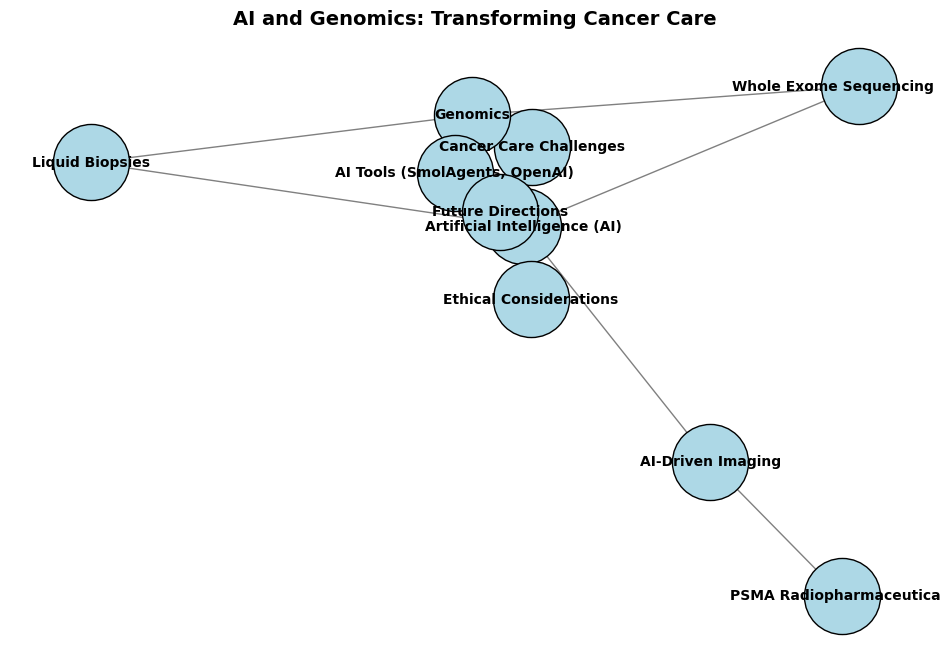

In [21]:
import matplotlib.pyplot as plt
import networkx as nx

# Define key elements for the diagram
nodes = [
    "Cancer Care Challenges",
    "Artificial Intelligence (AI)",
    "Genomics",
    "Liquid Biopsies",
    "Whole Exome Sequencing (WES)",
    "AI-Driven Imaging",
    "PSMA Radiopharmaceuticals",
    "AI Tools (SmolAgents, OpenAI)",
    "Ethical Considerations",
    "Future Directions"
]

edges = [
    ("Cancer Care Challenges", "Artificial Intelligence (AI)"),
    ("Cancer Care Challenges", "Genomics"),
    ("Artificial Intelligence (AI)", "Liquid Biopsies"),
    ("Artificial Intelligence (AI)", "Whole Exome Sequencing (WES)"),
    ("Artificial Intelligence (AI)", "AI-Driven Imaging"),
    ("Genomics", "Liquid Biopsies"),
    ("Genomics", "Whole Exome Sequencing (WES)"),
    ("AI-Driven Imaging", "PSMA Radiopharmaceuticals"),
    ("AI Tools (SmolAgents, OpenAI)", "Artificial Intelligence (AI)"),
    ("AI Tools (SmolAgents, OpenAI)", "Genomics"),
    ("Ethical Considerations", "Artificial Intelligence (AI)"),
    ("Future Directions", "Ethical Considerations"),
    ("Future Directions", "AI Tools (SmolAgents, OpenAI)"),
    ("Future Directions", "Cancer Care Challenges")
]

# Create a directed graph
G = nx.DiGraph()
G.add_nodes_from(nodes)
G.add_edges_from(edges)

# Draw the graph
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, seed=42)

# Nodes
nx.draw_networkx_nodes(G, pos, node_size=3000, node_color="lightblue", edgecolors="black")
nx.draw_networkx_labels(G, pos, font_size=10, font_color="black", font_weight="bold")

# Edges
nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=15, edge_color="gray", width=1)

# Title and display
plt.title("AI and Genomics: Transforming Cancer Care", fontsize=14, fontweight="bold")
plt.axis("off")
plt.show()